In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/UCSP/IX CICLO/topicos de IA/Lab 4/
%ls

/content/drive/MyDrive/UCSP/IX CICLO/topicos de IA/Lab 4
creditcard_2023.csv  Untitled0.ipynb


##REGRESIÓN LINEAL UNIVARIADA

In [3]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('creditcard_2023.csv')

# Función para normalizar usando Min-Max
def normalizar_min_max(df):
    scaler = MinMaxScaler()
    return pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

REGRESIÓN LINEAL UNIVARIADA CON SKLEARN

Variable seleccionada para la regresión univariada: V13

Resultados de la Regresión Lineal Univariada:
Error Cuadrático Medio en entrenamiento: 0.08321529682275353
Error Cuadrático Medio en prueba: 0.0831222626864957


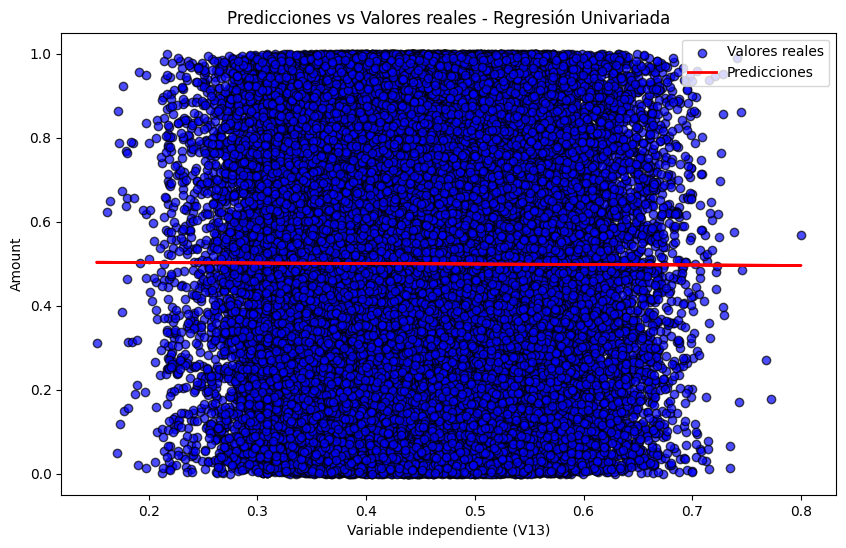

In [17]:
# -------------------------------
# REGRESIÓN LINEAL UNIVARIADA
# -------------------------------
print("REGRESIÓN LINEAL UNIVARIADA CON SKLEARN")

# Seleccionar la variable más correlacionada con 'Amount'
corr_with_amount = df.corr()['Amount'].abs().sort_values(ascending=False)
variable_seleccionada = corr_with_amount.index[1]
print(f"\nVariable seleccionada para la regresión univariada: {variable_seleccionada}")

# Preparar datos para la regresión lineal univariada
X_uni = df[[variable_seleccionada]]
y_uni = df['Amount']

# Normalización
X_uni_norm = normalizar_min_max(X_uni)
y_uni_norm = normalizar_min_max(pd.DataFrame(y_uni))

# División de datos (80% entrenamiento, 20% prueba)
X_train_uni, X_test_uni, y_train_uni, y_test_uni = train_test_split(X_uni_norm, y_uni_norm, test_size=0.2, random_state=42)

# Crear y entrenar el modelo univariado
modelo_univariado = LinearRegression()
modelo_univariado.fit(X_train_uni, y_train_uni)

# Hacer predicciones
y_pred_train_uni = modelo_univariado.predict(X_train_uni)
y_pred_test_uni = modelo_univariado.predict(X_test_uni)

# Calcular el Error Cuadrático Medio
mse_train_uni = mean_squared_error(y_train_uni, y_pred_train_uni)
mse_test_uni = mean_squared_error(y_test_uni, y_pred_test_uni)

print(f"\nResultados de la Regresión Lineal Univariada:")
print(f"Error Cuadrático Medio en entrenamiento: {mse_train_uni}")
print(f"Error Cuadrático Medio en prueba: {mse_test_uni}")

# Graficar predicciones vs valores reales para regresión univariada
plt.figure(figsize=(10, 6))

# Graficar los puntos de datos con contorno
plt.scatter(X_test_uni, y_test_uni, color='blue', edgecolor='black', alpha=0.7, label='Valores reales')

# Graficar la línea de predicciones
plt.plot(X_test_uni, y_pred_test_uni, color='red', linewidth=2, label='Predicciones')

plt.xlabel(f'Variable independiente ({variable_seleccionada})')
plt.ylabel('Amount')
plt.title('Predicciones vs Valores reales - Regresión Univariada')
plt.legend()
plt.show()


##REGRESIÓN LINEAL MULTIVARIADA

MSE (Train) usando sklearn: 0.08320908581681044
MSE (Test) usando sklearn: 0.08313167307966676


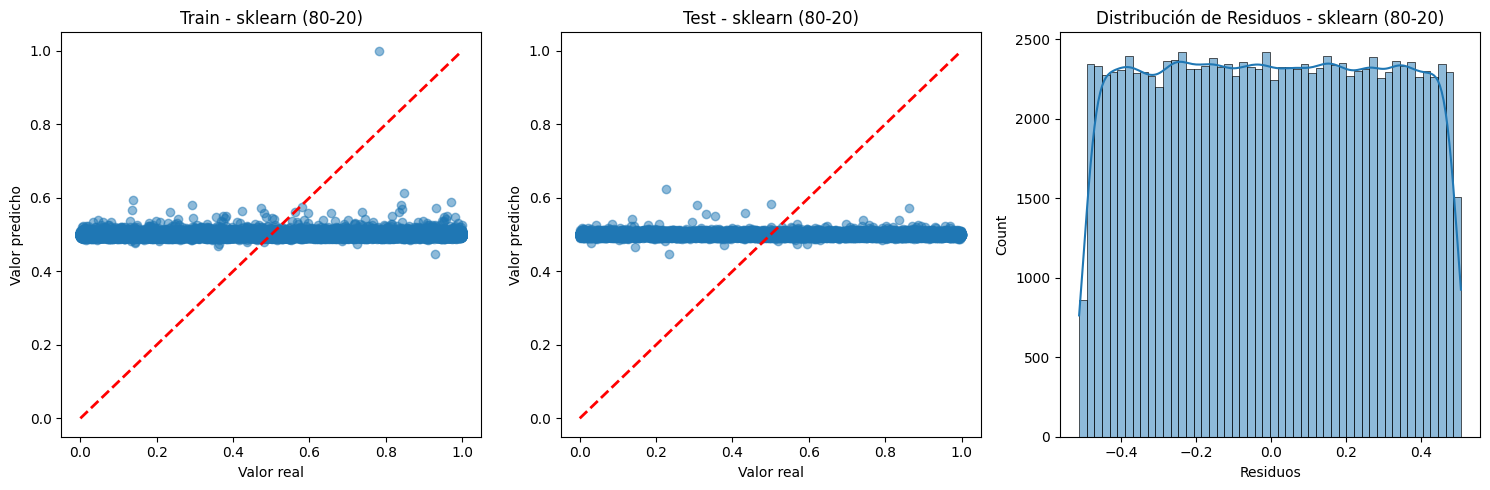

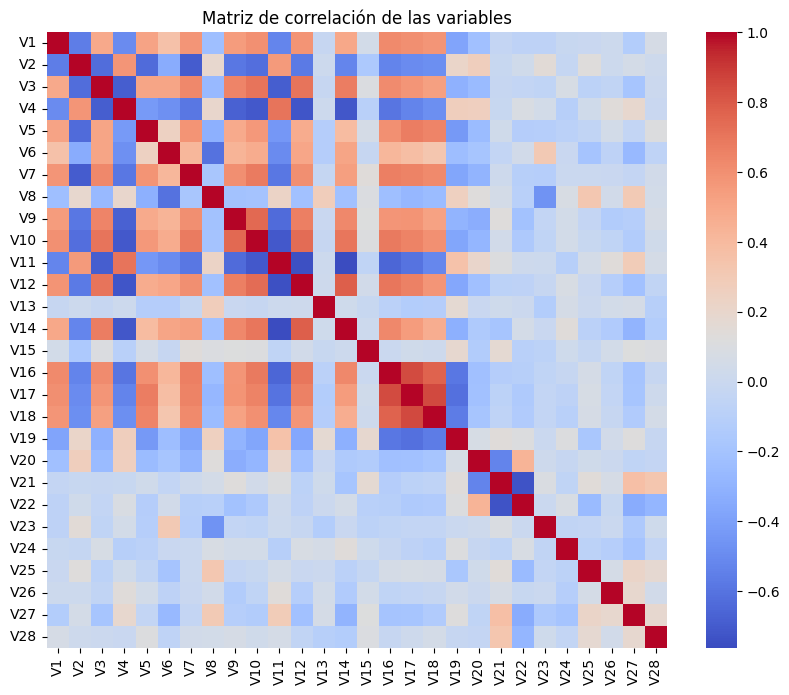


Variables con mayor correlación con 'Amount':
Amount    1.000000
V13       0.002718
V3        0.002001
V23       0.001981
V4        0.001859
V9        0.001589
V18       0.001516
V28       0.001503
V20       0.001405
V14       0.001363
Name: Amount, dtype: float64

Matriz de correlación de las 10 variables más correlacionadas con Amount:
          Amount       V13        V3       V23        V4        V9       V18  \
Amount  1.000000 -0.002718 -0.002001 -0.001981  0.001859 -0.001589 -0.001516   
V13    -0.002718  1.000000 -0.019272 -0.123520  0.011519 -0.006167 -0.122049   
V3     -0.002001 -0.019272  1.000000 -0.058884 -0.687726  0.648615  0.525509   
V23    -0.001981 -0.123520 -0.058884  1.000000  0.043266 -0.042371 -0.046262   
V4      0.001859  0.011519 -0.687726  0.043266  1.000000 -0.676648 -0.482267   
V9     -0.001589 -0.006167  0.648615 -0.042371 -0.676648  1.000000  0.522720   
V18    -0.001516 -0.122049  0.525509 -0.046262 -0.482267  0.522720  1.000000   
V28    -0.001503 -0

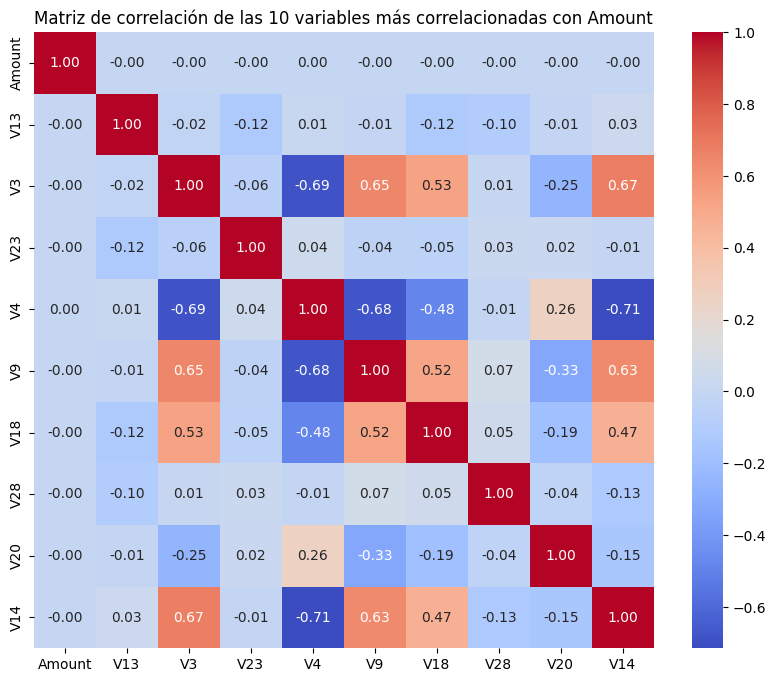

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Función para leer los datos
def leer_datos(ruta_archivo):
    return pd.read_csv(ruta_archivo)

# Cargar y preparar los datos
df = leer_datos('creditcard_2023.csv')

# Eliminar columnas no necesarias
X = df.drop(['id', 'Class', 'Amount'], axis=1)
y = df['Amount']

# Normalización usando MinMaxScaler de sklearn
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_norm = scaler_X.fit_transform(X)
y_norm = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Dividir los datos en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal usando sklearn
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X_train, y_train)

# Hacer predicciones en los conjuntos de entrenamiento y prueba
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

# Calcular el MSE (Mean Squared Error) para ambos conjuntos
mse_train_sklearn = mean_squared_error(y_train, y_pred_train)
mse_test_sklearn = mean_squared_error(y_test, y_pred_test)

print(f"MSE (Train) usando sklearn: {mse_train_sklearn}")
print(f"MSE (Test) usando sklearn: {mse_test_sklearn}")

# Visualización de los resultados usando sklearn
plt.figure(figsize=(15, 5))

# Gráfico de entrenamiento
plt.subplot(1, 3, 1)
plt.scatter(y_train, y_pred_train, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor predicho')
plt.title('Train - sklearn (80-20)')

# Gráfico de prueba
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor predicho')
plt.title('Test - sklearn (80-20)')

# Gráfico de residuos
plt.subplot(1, 3, 3)
residuos = y_test - y_pred_test
sns.histplot(residuos, kde=True)
plt.xlabel('Residuos')
plt.title('Distribución de Residuos - sklearn (80-20)')

plt.tight_layout()
plt.show()

# Crear matriz de correlación
corr_matrix = X.corr()

# Mostrar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Matriz de correlación de las variables")
plt.show()

# Encontrar las variables con mayor correlación con 'Amount'
df_corr = df.drop(['id', 'Class'], axis=1)
corr_matrix_with_amount = df_corr.corr()
correlaciones_amount = corr_matrix_with_amount['Amount'].abs().sort_values(ascending=False)

print("\nVariables con mayor correlación con 'Amount':")
print(correlaciones_amount.head(10))

# Visualizar la matriz de correlación (las 10 variables más correlacionadas con Amount)
top_10_vars = correlaciones_amount.head(10).index
print("\nMatriz de correlación de las 10 variables más correlacionadas con Amount:")
print(corr_matrix_with_amount.loc[top_10_vars, top_10_vars])

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_with_amount.loc[top_10_vars, top_10_vars], annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación de las 10 variables más correlacionadas con Amount")
plt.show()
